In [1]:
# Instal Library
!pip install numpy pandas scikit-learn joblib

In [43]:
# Baca Data
import pandas as pd

df = pd.read_csv("origin_data.csv")
df.head()

,No,Nama,Alamat,RT/RW,StatusLahan,StatusBangunan,JenisLantai,JenisDinding,JenisAtap,SumberAir,SumberPenerangan,BahanBakuMemasak,JenisKloset,JenisKendaraan,AsetPribadi,TelponRumah,Wifi,StatusPKH
0,1,"""JA'I""",Gg. Sinar Pagi I No 01,01-Mar,Pribadi,Pribadi,Vinyl,Bata Merah,Tanah Liat,PDAM,Listrik,Gas,Kloset Duduk,Mobil,Tanah,Ya,Ya,0
1,2,"""MA'RUF""",Gg. Sinar Pagi I No 02,01-Mar,Pribadi,Warisan,Keramik,Batako,Tanah Liat,Sanyo,Listrik,Kompor Minyak,Kloset Duduk,Motor,Tidak Ada,Tidak,Tidak,0
2,3,"""SARI'AH""",Gg. Sinar Pagi I No 03,01-Mar,Warisan,Umum,Semen,Hebel,Asbes,Sumur,Listrik,Tungku,Kloset Jongkok,Sepeda,Sawah,Tidak,Tidak,1
3,4,A NAZARUDDIN LATIF,Gg. Sinar Pagi I No 04,01-Mar,Negara,Pribadi,Keramik,Kayu,Asbes,PDAM,Lainnya,Gas,Kloset Jongkok,Angkutan Umum,Tidak Ada,Tidak,Tidak,1
4,5,AA SUGIANA,Gg. Sinar Pagi I No 05,01-Mar,Pribadi,Warisan,Teraso,GRC,Seng,Sanyo,Listrik,Gas,Kloset Jongkok,Motor,Tidak Ada,Tidak,Tidak,0


In [10]:
# Menentukan Kolom Fitur dan Label
df_n = df.iloc[:, 4:]
df_n

,StatusLahan,StatusBangunan,JenisLantai,JenisDinding,JenisAtap,SumberAir,SumberPenerangan,BahanBakuMemasak,JenisKloset,JenisKendaraan,AsetPribadi,TelponRumah,Wifi,StatusPKH
0,Pribadi,Pribadi,Vinyl,Bata Merah,Tanah Liat,PDAM,Listrik,Gas,Kloset Duduk,Mobil,Tanah,Ya,Ya,0
1,Pribadi,Warisan,Keramik,Batako,Tanah Liat,Sanyo,Listrik,Kompor Minyak,Kloset Duduk,Motor,Tidak Ada,Tidak,Tidak,0
2,Warisan,Umum,Semen,Hebel,Asbes,Sumur,Listrik,Tungku,Kloset Jongkok,Sepeda,Sawah,Tidak,Tidak,1
3,Negara,Pribadi,Keramik,Kayu,Asbes,PDAM,Lainnya,Gas,Kloset Jongkok,Angkutan Umum,Tidak Ada,Tidak,Tidak,1
4,Pribadi,Warisan,Teraso,GRC,Seng,Sanyo,Listrik,Gas,Kloset Jongkok,Motor,Tidak Ada,Tidak,Tidak,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Negara,Umum,Keramik,Hebel,Asbes,Sanyo,Listrik,Gas,Kloset Duduk,Motor,Tidak Ada,Tidak,Tidak,0
120,Pribadi,Pribadi,Vinyl,Kayu,Tanah Liat,PDAM,Listrik,Gas,Kloset Jongkok,Motor,Tidak Ada,Tidak,Tidak,0
121,Warisan,Warisan,Keramik,GRC,Tanah Liat,Sanyo,Listrik,Gas,Kloset Jongkok,Motor,Tidak Ada,Tidak,Tidak,0
122,Pribadi,Pribadi,Semen,Batako,Tanah Liat,Sumur,Listrik,Gas,Kloset Jongkok,Motor,Tidak Ada,Tidak,Tidak,0


In [12]:
# Prepocessing Mapping Fitur -> ordinal ke numerik
features = df_n.columns
data_maps = {
            "StatusLahan": {"Pribadi": 1, "Warisan": 2, "Negara": 3},
            "StatusBangunan": {"Pribadi": 1, "Warisan": 2, "Umum": 3},
            "JenisLantai": {"Teraso": 1, "Keramik": 2, "Vinyl": 3, "Semen": 4},
            "JenisDinding": {"Hebel": 1, "Batako": 2, "Bata Merah": 3, "GRC": 4, "Kayu": 5},
            "JenisAtap": {"Tanah Liat": 1, "Asbes": 2, "Seng": 3},
            "SumberAir": {"PDAM": 1, "Sanyo": 2, "Sumur": 3},
            "SumberPenerangan": {"Listrik": 1, "Lainnya": 2},
            "BahanBakuMemasak": {"Gas": 1, "Kompor Minyak": 2, "Tungku": 3},
            "JenisKloset": {"Kloset Duduk": 1, "Kloset Jongkok": 2},
            "JenisKendaraan": {"Mobil": 1, "Motor": 2, "Sepeda": 3, "Angkutan Umum": 4},
            "AsetPribadi": {"Tanah": 1, "Sawah": 2, "Rumah": 3, "Tidak Ada": 4},
            "TelponRumah": {"Ya": 1, "Tidak": 2},
            "Wifi": {"Ya": 1, "Tidak": 2}
        }

for col in features[:-1]:
  df_n[col]=df_n[col].replace(data_maps[col])

df_n

,StatusLahan,StatusBangunan,JenisLantai,JenisDinding,JenisAtap,SumberAir,SumberPenerangan,BahanBakuMemasak,JenisKloset,JenisKendaraan,AsetPribadi,TelponRumah,Wifi,StatusPKH
0,1,1,3,3,1,1,1,1,1,1,1,1,1,0
1,1,2,2,2,1,2,1,2,1,2,4,2,2,0
2,2,3,4,1,2,3,1,3,2,3,2,2,2,1
3,3,1,2,5,2,1,2,1,2,4,4,2,2,1
4,1,2,1,4,3,2,1,1,2,2,4,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,3,3,2,1,2,2,1,1,1,2,4,2,2,0
120,1,1,3,5,1,1,1,1,2,2,4,2,2,0
121,2,2,2,4,1,2,1,1,2,2,4,2,2,0
122,1,1,4,2,1,3,1,1,2,2,4,2,2,0


In [19]:
# Split Data Train dan Test

from sklearn.model_selection import train_test_split

x, y = df_n.iloc[:, :-1], df_n.iloc[:, -1:]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=70)

In [21]:
# Preprocessing Dengan MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

# from sklearn.preprocessing import StandardScaler

# x_train = StandardScaler().fit_transform(x_train)
# x_test = StandardScaler().fit_transform(x_test)

In [27]:
# inisialisasi code manual
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class PerceptronManual(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.1, num_epochs=100):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None

    def fit(self, x_train, y_train):
        num_samples, num_features = x_train.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_epochs):
            for i in range(num_samples):
                z = np.dot(x_train[i], self.weights) + self.bias
                y_pred = self.step_function(z)
                error = y_train[i] - y_pred
                self.weights += self.learning_rate * error * x_train[i]
                self.bias += self.learning_rate * error

    def predict(self, x_test):
        num_samples = x_test.shape[0]
        y_pred = np.zeros(num_samples, dtype=int)
        for i in range(num_samples):
            z = np.dot(x_test[i], self.weights) + self.bias
            y_pred[i] = self.step_function(z)
        return y_pred

    def predict_proba(self, x_test):
        num_samples = x_test.shape[0]
        proba = np.zeros((num_samples, 2))  # 2 classes (0 and 1)
        for i in range(num_samples):
            z = np.dot(x_test[i], self.weights) + self.bias
            sigmoid = 1 / (1 + np.exp(-z))
            proba[i, 1] = sigmoid  # Probability of class 1
            proba[i, 0] = 1 - sigmoid  # Probability of class 0
        return proba

    def step_function(self, z):
        return 1 if z >= 0 else 0

# Inisialisasi model perceptron manual
model_perceptron = PerceptronManual(learning_rate=0.1, num_epochs=100)

# You need to define x_train and y_train here before calling fit
# Mengonversi label kelas menjadi 1 dan 0
y_train = np.where(y_train == 0, 1, 0)

In [29]:
# Latih model perceptron manual menggunakan data pelatihan

model_perceptron.fit(x_train, y_train)

In [31]:
# Prediksi dengan model perceptron manual

y_pred_perceptron = model_perceptron.predict(x_test)

In [33]:
# Evaluasi Model

perceptron_accuracy = accuracy_score(y_pred_perceptron, y_test)
perceptron_accuracy

0.9629629629629629

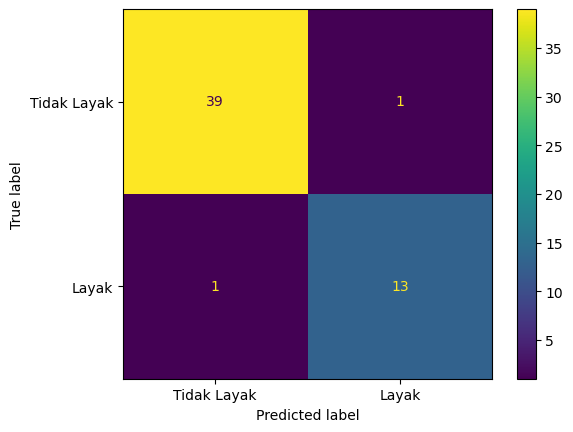

In [39]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred_perceptron)
ConfusionMatrixDisplay(cm,display_labels=['Tidak Layak','Layak']).plot()

In [41]:
# Hasil Precission, Recall dan F1-Scores

from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred_perceptron))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.93      0.93      0.93        14

    accuracy                           0.96        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.96      0.96      0.96        54

